### Подключение библиотек и пакетов

In [1]:
import numpy as np
import pandas as pd
import itertools
import os
from time import time

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Настройка глобальных переменных

In [2]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/car_price')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/car_price')


img_dir = os.path.join(os.getcwd(), 'img_data_preproccecing')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

## Настройка pandas

In [3]:
# установка максимального количества столбцов и строк для вывода
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 25)

# установка количества знаков после запятой
pd.set_option("precision", 2)

## Просмотр первичных (сырых) данных

Загрузка данных с репозитория и чтение данных

In [95]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/car_price https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price.csv

--2021-04-13 13:12:25--  https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375130 (366K) [text/plain]
Saving to: ‘data/car_price/car_price.csv’

car_price.csv       100%[===================>] 366.34K  --.-KB/s    in 0.03s   

2021-04-13 13:12:25 (12.0 MB/s) - ‘data/car_price/car_price.csv’ saved [375130/375130]



Чтение данных

In [96]:
df = pd.read_csv(os.path.join(data_dir, 'car_price.csv'))
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


Вывод основной информации по набору данных

In [97]:
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')
print(f'Вывод общей информации по датафрейму и признакам:\n')
print(df.info())

Количество строк: 4800
Количество столбцов: 8
Вывод общей информации по датафрейму и признакам:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB
None


Описания признаков:

|Название|Перевод|Тип данных|Тип признака|
|---|---|---|---|
|model|Модель|Строка|Категриальный|
|body|Тип кузова|Строка|Категориальный|
|color|Цвет кузова|Строка|Категориальный|
|km|Пробег в км.|Число|Количественный|
|transmission|Тип КПП|Строка|Категориальный|
|extras|Дополнительные опции|Строка|Категориальный|
|price|Стоимость|Число|Количественный|

Вывод основных статистических характеристик по числовым признакам

In [98]:
df.describe()

,km,hp,price
count,4800.00,4800.0,4800.00
mean,31912.91,85.0,19722.87
std,35899.45,0.0,4337.52
min,0.00,85.0,5555.00
25%,4700.00,85.0,15990.00
50%,20005.00,85.0,19588.00
75%,47800.00,85.0,22692.50
max,291800.00,85.0,56100.00


## Предварительная обработка данных  (Data Preprocessing)

Видно, что признак 'hp' (мощность) у всех объектов имеет одно и то же значение. Следовательно, данный признак неинформативный, и его можно удалить

In [8]:
df.drop(['hp'], axis=1, inplace=True)

Переименуем признаки на более удобо-читаемые названия

In [9]:
df.columns = ['model', 'body', 'color', 'km', 'transmission', 'extras', 'price']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         4800 non-null   object
 1   body          4800 non-null   object
 2   color         4800 non-null   object
 3   km            4800 non-null   int64 
 4   transmission  4800 non-null   object
 5   extras        4800 non-null   object
 6   price         4800 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.6+ KB


По выведенной информации выше видно, что данные не имеют пропусков. Сначала выведем график отношений признаков друг с другом

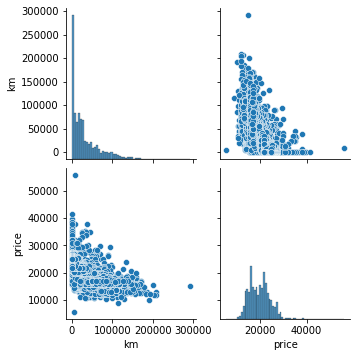

In [10]:
# вывод графика отношений признаков друг с другом числовых признаков
sns.pairplot(df)
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Features Pair Plot.png'))

Видно, что признак `km` (пробег автомобиля) отрицательно коррелирует с целевым признаком `price` (стоимость). Узнаем насколько сильна корреляция 

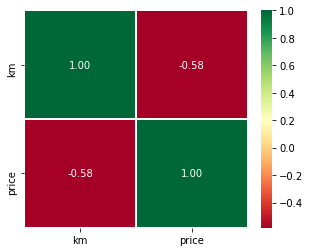

In [11]:
# Визуализация матрицы корреляции: построение корреляционной карты
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=.5, fmt= '.2f',ax=ax);
plt.savefig(os.path.join(img_dir, 'Car Price Prediction. Features Corellation Matrix.png'))

Выведем статистику по нечисловым признакам

In [12]:
df.describe(include=["object", "bool"])

,model,body,color,transmission,extras
count,4800,4800,4800,4800,4800
unique,3,7,13,3,325
top,Audi A3,Sedans,Black,Manual,Alloy wheels
freq,2642,3495,1443,2435,1717


Посмотрим распределение значений для признака 'model'

In [13]:
df["model"].value_counts()

Audi A3    2642
Audi A1    2157
Audi A2       1
Name: model, dtype: int64

Удаляем запись с Audi A2, т.к. имеется всего одна запись с ней

In [14]:
df = df.drop(df[df['model'] == 'Audi A2'].index)

Запишем в отдельную переменную вектор ответов (целевых признаков)

In [15]:
target = df["price"].values

Сохраним значения агрегированных функций для категориалных признаков относительно цены

In [17]:
features = ['model', 'body', 'color', 'transmission']
features_info = {
    feature: {
        'uniques': df[feature].unique(),
        'mean': [df.loc[df[feature] == val, 'price'].mean() for val in df[feature].unique()],
        'std': [df.loc[df[feature] == val, 'price'].std() for val in df[feature].unique()],
        'count': [df.loc[df[feature] == val, 'price'].count() for val in df[feature].unique()]
    } for feature in features
}

Заменяем значения категориальных признаков на новые бинарные признаки

In [19]:
df = pd.get_dummies(df, columns=['model', 'body', 'color', 'transmission'])
columns = df.columns.values
df.rename({column: column.split("_")[-1] for column in columns}, axis="columns", inplace=True)

extras = df['extras'].str.get_dummies(",")
df.drop(columns=['extras'], inplace=True)
df = pd.concat([df, extras], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4799
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   km                   4799 non-null   int64
 1   price                4799 non-null   int64
 2   Audi A1              4799 non-null   uint8
 3   Audi A3              4799 non-null   uint8
 4   Compact              4799 non-null   uint8
 5   Convertible          4799 non-null   uint8
 6   Coupe                4799 non-null   uint8
 7   Other                4799 non-null   uint8
 8   Sedans               4799 non-null   uint8
 9   Station wagon        4799 non-null   uint8
 10  Beige                4799 non-null   uint8
 11  Black                4799 non-null   uint8
 12  Blue                 4799 non-null   uint8
 13  Bronze               4799 non-null   uint8
 14  Brown                4799 non-null   uint8
 15  Green                4799 non-null   uint8
 16  Grey                 479

Выведем графики средней цены автомобиля с учетом типа кузова, цвета, трансмиссии и модели

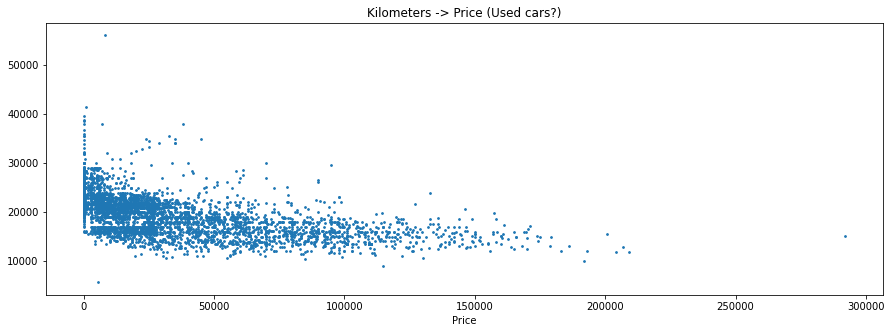

In [22]:
from math import floor

# Kilometers - Price 
fig, km_to_price = plt.subplots(figsize=(15, 5))
kms = df["km"].values
km_to_price.scatter(kms, target, s=3)
km_to_price.set_xlabel("Kilometers")
km_to_price.set_xlabel("Price")
km_to_price.set_title("Kilometers -> Price (Used cars?)")
plt.show()



TypeError: ignored

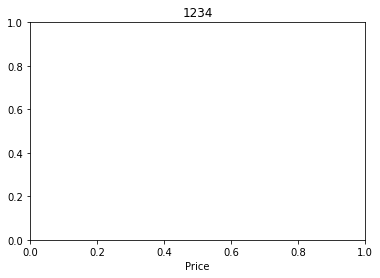

In [29]:
plt.title('1234')
plt.xlabel("Price")
plt.barh(y=features_info['model']["uniques"],
         width=features_info['model']["mean"],
         xerr=features_info['model']["std"], label='sdf', text=(features_info['model']["std"] + 3, i + .25, str(features_info['model']["std"])))

for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

[4398.853347710247, 4045.56815216956]
model
[4182.964577573618, 4022.127534046336, 4660.718895092194, 1952.1449741246165, 3315.808455608634, 14368.232397831518]
body
[4244.982846992772, 4249.779405295875, 2803.8143630737036, 4252.018512368445, 4138.5480602184, 4757.991607762291, 3947.795440158234, 2904.520389881623, 6951.297241043095, 4231.045053194925, 3112.8740652709603, 1838.4776310850236, nan]
color
[3872.549593280497, 3606.990907855554, 6107.015653400621]
transmission


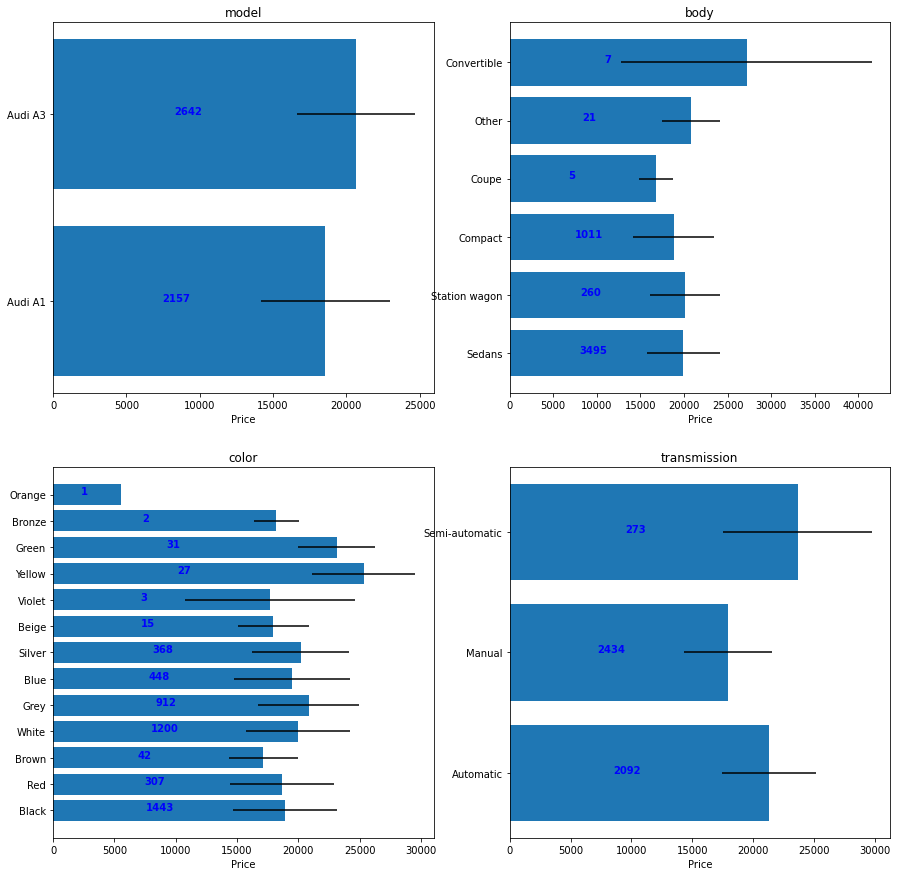

In [24]:
# Features - Price
fig, axes = plt.subplots(2, len(features) // 2, figsize=(15,15))
for i, feature in enumerate(features_info):
  print(features_info[feature]["std"])
  print(feature)
  axes[floor(i // 2), i % 2].set_title(feature)
  axes[floor(i // 2), i % 2].set_xlabel("Price")
  axes[floor(i // 2), i % 2].barh(y=features_info[feature]["uniques"],
                                  width=features_info[feature]["mean"],
                                  xerr=features_info[feature]["std"])
  for j, v in enumerate(features_info[feature]["count"]):
    axes[floor(i // 2), i % 2].text(features_info[feature]["mean"][j] / 2.5, j, 
                                  f'{v}', color='blue', fontweight='bold')

In [25]:
print(f"Target mean: {target.mean()} target std: {target.std()}")

Target mean: 19721.105438633047 target std: 4335.79312815377


In [27]:
from sklearn.model_selection import train_test_split

numpy_data = df.drop(columns=["price"]).values

x_train, x_test, y_train, y_test = train_test_split(numpy_data, target, test_size=0.3, random_state=24)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score
# создание и настройка модели линейной регресси с МНК (метод наименьших квадратов)
linreg_least_squares = LinearRegression()

# обучение модели
linreg_least_squares.fit(x_train, y_train)

# точность работы на обучающей выборке
score_least_squares = linreg_least_squares.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_least_squares}')
print(f'Коэффициенты модели: {linreg_least_squares.coef_}')

cross_scores_least_squares = cross_val_score(linreg_least_squares, x_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_least_squares}')

# применение модели на тестовой выборке
y_pred = linreg_least_squares.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred

Точность работы на обучающей выборке: 0.6665917058270779
Коэффициенты модели: [-7.58352634e-02 -1.54099381e+03  1.54099381e+03 -6.63749108e+02
  7.32889672e+03 -4.54861847e+03 -9.45800538e+01 -9.53925331e+02
 -1.06802376e+03 -1.35129633e+03 -6.63660082e+02 -3.26601212e+02
 -1.21111697e+03 -1.63702560e+03  2.39698532e+03 -3.61141544e+02
 -1.47156243e-09 -7.42979607e+02 -8.42103546e+02  7.25296122e+02
 -2.86430353e+02  4.30007381e+03  2.50162332e+01 -2.59234179e+03
  2.56732556e+03  7.20480063e+02 -9.97843143e+01  1.40209196e+02
 -6.44700519e+02 -2.49371702e+02  6.58241913e+02  3.62653905e+02
 -1.13052250e+03  2.87174934e+02 -2.47062420e+02  4.78285208e+02
  1.95705126e+03 -1.50366415e+02 -2.00233900e+03 -1.19876619e+01
 -8.20700644e+02]
Кросс-валидация: [0.62620308 0.6545573  0.63402309 0.64355171 0.66961435]


,Actual,Predicted
0,20845,21473.84
1,22880,22592.77
2,22000,22417.82
3,20700,21966.02
4,16000,18210.77
...,...,...
1435,23639,21554.94
1436,21990,18865.24
1437,12888,16935.47
1438,17900,18644.13


In [32]:
# оценка регрессии
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадраичная ошибка (RMSE): {np.sqrt(r2_score(y_test, y_pred)):.2f}')

Оценка регрессии (R2): 0.63
Среднеквадраичная ошибка (RMSE): 0.80


Получим список уникальных опций

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['km', 'price']
df_ohe[numeric_vars] = scaler.fit_transform(df_ohe[numeric_vars])
df_ohe.head()

In [ ]:
# разделение данных на ответы (y) и объекты с описанием признаков (x) 
y = df_ohe['price'].values
x = df_ohe.drop(['price'], axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

# разделение выборок на обучающую и тестовую в соотношении 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score

## Метод наименьших квадратов

In [37]:
from sklearn.linear_model import LinearRegression
# создание и настройка модели линейной регресси с МНК (метод наименьших квадратов)
linreg_least_squares = LinearRegression()

# обучение модели
linreg_least_squares.fit(x_train, y_train)

# точность работы на обучающей выборке
score_least_squares = linreg_least_squares.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_least_squares:.2f}')
print(f'Коэффициенты модели: {linreg_least_squares.coef_}')

# cross_scores_least_squares = cross_val_score(linreg_least_squares, x_train, y_train, scoring='r2', cv=5)
# print(f'Кросс-валидация: {cross_scores_least_squares}')

# применение модели на тестовой выборке
y_pred = linreg_least_squares.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred

Точность работы на обучающей выборке: 0.67
Коэффициенты модели: [-7.58352634e-02 -1.54099381e+03  1.54099381e+03 -6.63749108e+02
  7.32889672e+03 -4.54861847e+03 -9.45800538e+01 -9.53925331e+02
 -1.06802376e+03 -1.35129633e+03 -6.63660082e+02 -3.26601212e+02
 -1.21111697e+03 -1.63702560e+03  2.39698532e+03 -3.61141544e+02
 -1.47156243e-09 -7.42979607e+02 -8.42103546e+02  7.25296122e+02
 -2.86430353e+02  4.30007381e+03  2.50162332e+01 -2.59234179e+03
  2.56732556e+03  7.20480063e+02 -9.97843143e+01  1.40209196e+02
 -6.44700519e+02 -2.49371702e+02  6.58241913e+02  3.62653905e+02
 -1.13052250e+03  2.87174934e+02 -2.47062420e+02  4.78285208e+02
  1.95705126e+03 -1.50366415e+02 -2.00233900e+03 -1.19876619e+01
 -8.20700644e+02]


,Actual,Predicted
0,20845,21473.84
1,22880,22592.77
2,22000,22417.82
3,20700,21966.02
4,16000,18210.77
...,...,...
1435,23639,21554.94
1436,21990,18865.24
1437,12888,16935.47
1438,17900,18644.13


In [39]:
# оценка регрессии
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(r2_least_squares):.2f}')

Оценка регрессии (R2): 0.63
Среднеквадратичная ошибка (RMSE): 0.80


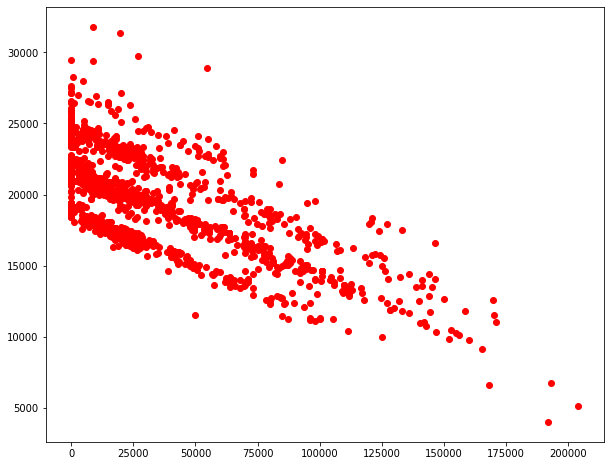

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(x_test[:,0], y_pred, 'ro')

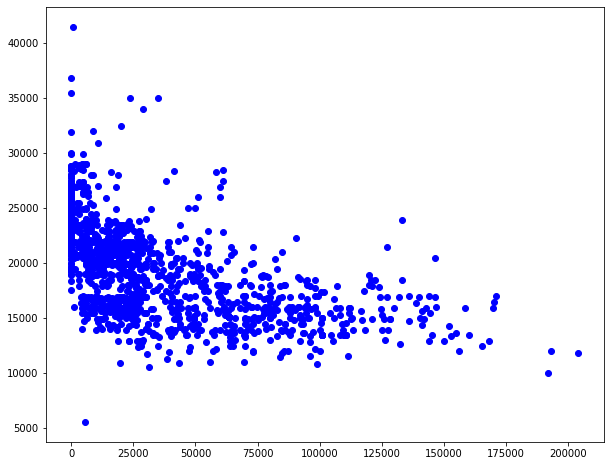

In [60]:
plt.figure(figsize=(10, 8))
plt.plot(x_test[:,0], y_test, 'bo')

## Метод опорных векторов

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [82]:
from sklearn.svm import SVR
linreg_svr = make_pipeline(StandardScaler(),
                           SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0,
                                        tol=1e-3, C=1.0, epsilon=0.1, max_iter=-1))
linreg_svr.fit(x_train, y_train)
linreg_svr.named_steps
# linreg_svr.named_steps['svr'].coef_
score_svr = linreg_svr.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_svr}')
# print(f'Коэффициенты модели: {linreg_svr.named_steps['svr'].coef_}')

cross_scores_svr = cross_val_score(linreg_svr, x_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_svr}')

# применение модели на тестовой выборке
y_pred = linreg_svr.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred



Точность работы на обучающей выборке: 0.017772841127681294
Кросс-валидация: [0.01136069 0.01201179 0.01369059 0.01233268 0.01088797]


,Actual,Predicted
0,20845,19738.39
1,22880,19757.16
2,22000,19812.35
3,20700,19843.89
4,16000,19723.06
...,...,...
1435,23639,19760.19
1436,21990,19661.24
1437,12888,19677.64
1438,17900,19765.04


In [83]:
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(r2_least_squares):.2f}')

Оценка регрессии (R2): 0.02
Среднеквадратичная ошибка (RMSE): 0.13


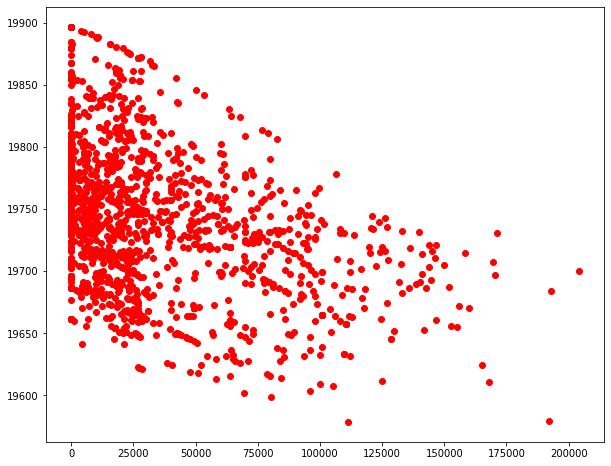

In [84]:
plt.figure(figsize=(10, 8))
plt.plot(x_test[:,0], y_pred, 'ro')

## Метод ближайших соседей

In [86]:
from sklearn.neighbors import KNeighborsRegressor
linreg_knn = KNeighborsRegressor(n_neighbors=2)
linreg_knn.fit(x_train, y_train)
score_knn = linreg_knn.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_knn}')

cross_scores_knn = cross_val_score(linreg_knn, x_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_knn}')

# применение модели на тестовой выборке
y_pred = linreg_knn.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred



Точность работы на обучающей выборке: 0.8136342629755765
Кросс-валидация: [0.40933939 0.37495704 0.41420468 0.47514819 0.4337773 ]


,Actual,Predicted
0,20845,20890.0
1,22880,14975.0
2,22000,23500.0
3,20700,20400.0
4,16000,21570.0
...,...,...
1435,23639,22687.0
1436,21990,21990.0
1437,12888,17240.0
1438,17900,16895.0


In [87]:
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(r2_least_squares):.2f}')

Оценка регрессии (R2): 0.42
Среднеквадратичная ошибка (RMSE): 0.65


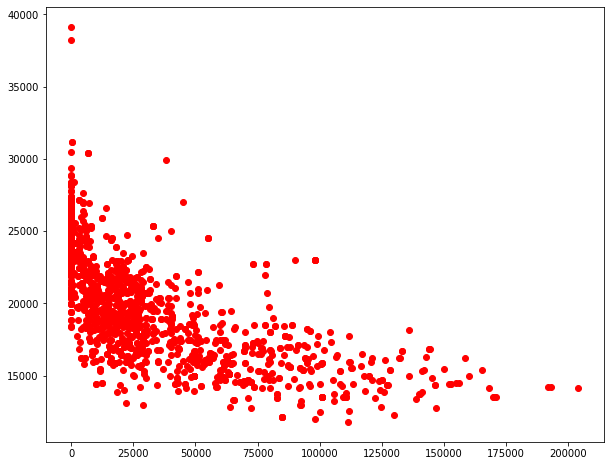

In [88]:
plt.figure(figsize=(10, 8))
plt.plot(x_test[:,0], y_pred, 'ro')

In [91]:
from sklearn.linear_model import SGDRegressor
reg_sgd = make_pipeline(StandardScaler(),
                        SGDRegressor(max_iter=1000, tol=1e-3))
reg_sgd.fit(x_train, y_train)
score_svr = reg_sgd.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_svr}')

cross_scores_svr = cross_val_score(reg_sgd, x_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_svr}')

y_pred = reg_sgd.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred

Точность работы на обучающей выборке: -5437.229586711891
Кросс-валидация: [ 0.38925581 -1.2461125  -0.97057266  0.57593107  0.503585  ]


,Actual,Predicted
0,20845,21803.77
1,22880,6652.62
2,22000,23123.75
3,20700,22528.78
4,16000,24044.05
...,...,...
1435,23639,21528.15
1436,21990,7877.84
1437,12888,23309.28
1438,17900,12005.52


In [90]:
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(r2_least_squares):.2f}')

Оценка регрессии (R2): -8411.60
Среднеквадратичная ошибка (RMSE): nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


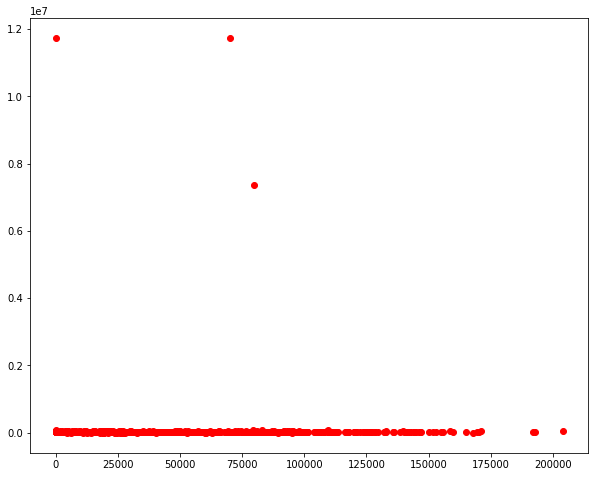

In [92]:
plt.figure(figsize=(10, 8))
plt.plot(x_test[:,0], y_pred, 'ro')

In [94]:
from sklearn.linear_model import LogisticRegression
reg_logistic = make_pipeline(StandardScaler(),
                        LogisticRegression(max_iter=1000, random_state=0))
reg_logistic.fit(x_train, y_train)
score_svr = reg_logistic.score(x_train, y_train)
print(f'Точность работы на обучающей выборке: {score_svr}')

cross_scores_svr = cross_val_score(reg_logistic, x_train, y_train, scoring='r2', cv=5)
print(f'Кросс-валидация: {cross_scores_svr}')

y_pred = reg_logistic.predict(x_test)
df_y_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_y_pred

Точность работы на обучающей выборке: 0.31705864840726405


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Кросс-валидация: [0.46204636 0.4409831  0.3514089  0.40285146 0.44748432]


,Actual,Predicted
0,20845,20990
1,22880,26830
2,22000,22500
3,20700,22500
4,16000,19980
...,...,...
1435,23639,21854
1436,21990,20988
1437,12888,15850
1438,17900,17800


In [ ]:
r2_least_squares = r2_score(y_test, y_pred)
print(f'Оценка регрессии (R2): {r2_least_squares:.2f}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(r2_least_squares):.2f}')